# Mini Project 4

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

In the lectures we explored how to delta hedge sold call options, resulting in a trading strategy whose profits are neutral to upward or downward drift in a stock path movements, provided the volatility, or $\sigma$, of the stock remained constant.

For this final mini project explore the impact of a non-constant $\sigma$ on the distribution of profits of hedging. You are also encouraged to explore/research a $\sigma$-hedging strategy and write code that simulates the profit distribution of the $\sigma$-hedging strategy. 

Below is some code you can customize that simulates a stock path whose $\sigma$ is not constant.

You are encouraged to use a different model for sigma then the one provided. You can use stock paths simulated by Heston model? You could use a GARCH model for volatility. The choice is yours and you can do your own research to choose how to model a stock movement. 

In [1]:
#Package Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import norm
import scipy.stats as stats

### Recall:

We used Monte-Carlo simulation to understand the distribution of profits of selling call options whose underlying stock follows a Geometric Brownian motion.

In [2]:
#Import functions associated with Black-Scholes Equations
from functions_black_scholes import *


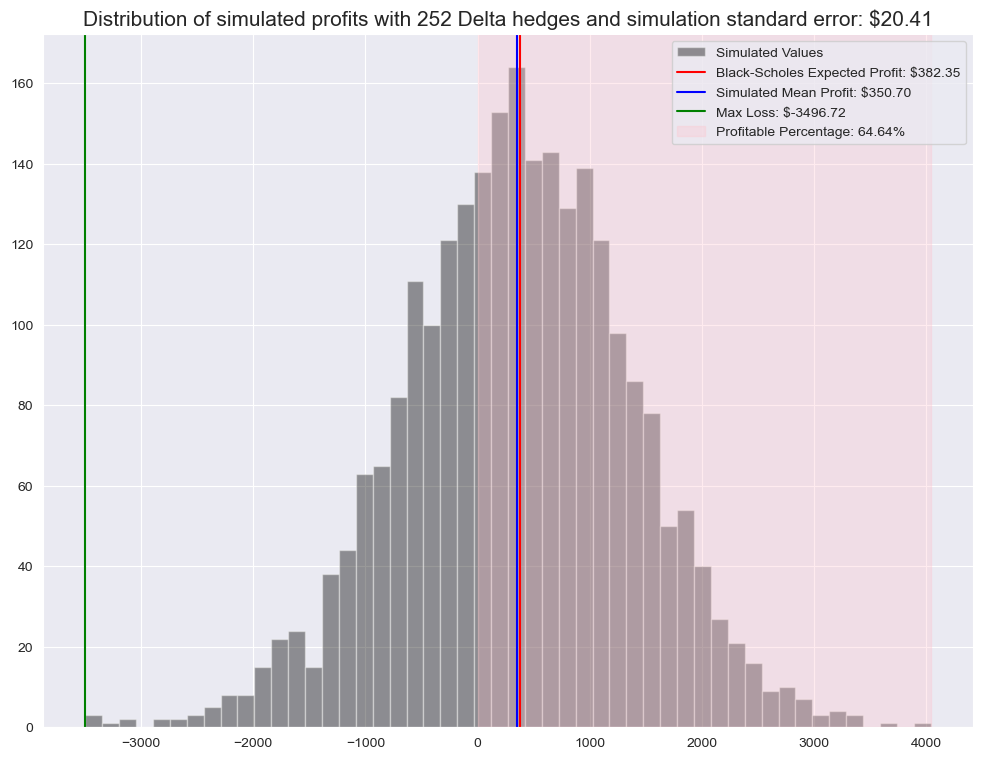

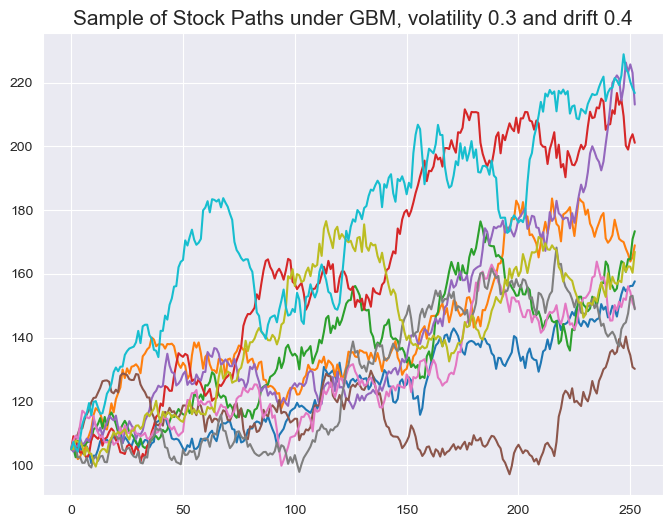

In [3]:
#Simulate and plot histograms of a 
#seller of 1000 call option contracts that receives a premium above the Black-Scholes Price

S0 = 105
K = 100
sigma = .3
t = 1
r = 0.035
mu = .4 #Drift of stock movement
n_sims = 2500
n_hedges = 252


premium = bs_call(S0,K,sigma + .01,t,r) #Increased volatility results in higher price in Black-Scholes model
num_options = 1000

bs_price = bs_call(S0,K,sigma,t,r)

sold_calls_hedged = bs_MC_call(S0, K, sigma, t, r, mu, n_sims, n_hedges)

profits_hedged = num_options*(premium - sold_calls_hedged)



plt.figure(figsize = (12,9))

plt.hist(profits_hedged, bins = 50, alpha = .4, color = 'black', label = 'Simulated Values')

plt.axvline(num_options*(premium-bs_price), label = f'Black-Scholes Expected Profit: ${num_options*(premium-bs_price):.2f}', color = 'red')

plt.axvline(np.mean(profits_hedged), label = f'Simulated Mean Profit: ${np.mean(profits_hedged):.2f}', color = 'blue')

plt.axvline(np.min(profits_hedged), label = f'Max Loss: ${np.min(profits_hedged):.2f}', color = 'green')

plt.axvspan(0,np.max(profits_hedged), color='pink', alpha=0.3,\
label = f'Profitable Percentage: {np.mean(profits_hedged>=0)*100}%')

plt.legend()

plt.title(f'Distribution of simulated profits with {n_hedges} \
Delta hedges and simulation standard error: \${np.std(profits_hedged)/np.sqrt(n_sims):.2f}',size = 15)

plt.show()



### Plot sample stock paths with GBM assumptions
noise = np.random.normal(0,1,(10,n_hedges))

dt = t/n_hedges

increments = (mu + r - .5*sigma**2)*dt + sigma*np.sqrt(dt)*noise

log_returns = np.cumsum(increments, axis = 1)

paths = S0*np.exp(log_returns)

paths = np.insert(paths, 0, S0, axis = 1)

plt.figure(figsize = (8,6))

for path in paths:
    plt.plot(path)
    
plt.title(f'Sample of Stock Paths under GBM, volatility {sigma} and drift {mu}', size = 15)

plt.show()

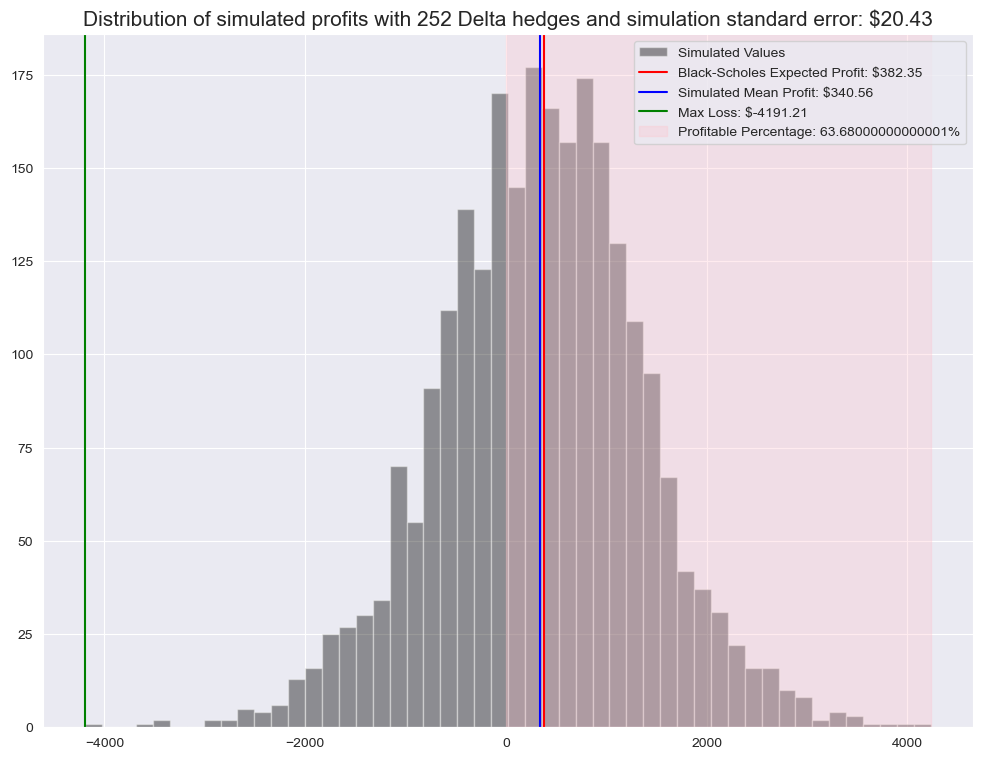

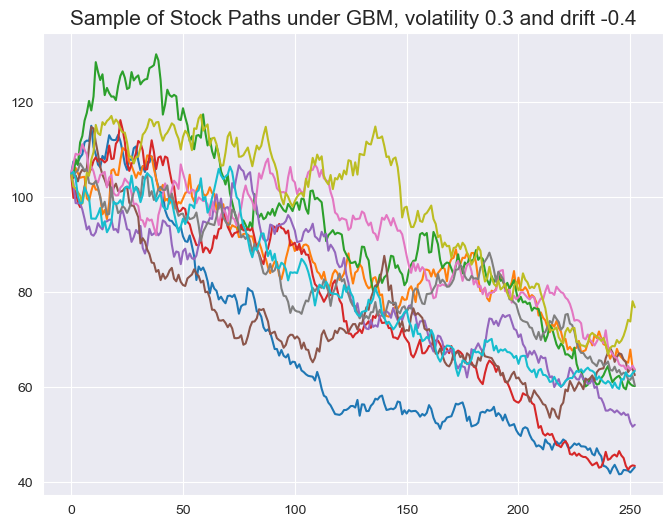

In [4]:
### Repeat simulation above but with different drift term in stock model

#Simulate and plot histograms of a 
#seller of 1000 call option contracts that receives a premium above the Black-Scholes Price

S0 = 105
K = 100
sigma = .3
t = 1
r = 0.035
mu = -.4 #Drift of stock movement
n_sims = 2500
n_hedges = 252

premium = bs_call(S0,K,sigma + .01,t,r) #Increased volatility results in higher price in Black-Scholes model
num_options = 1000

bs_price = bs_call(S0,K,sigma,t,r)

sold_calls_hedged = bs_MC_call(S0, K, sigma, t, r, mu, n_sims, n_hedges)


profits_hedged = num_options*(premium - sold_calls_hedged)


plt.figure(figsize = (12,9))

plt.hist(profits_hedged, bins = 50, alpha = .4, color = 'black', label = 'Simulated Values')

plt.axvline(num_options*(premium-bs_price), label = f'Black-Scholes Expected Profit: ${num_options*(premium-bs_price):.2f}', color = 'red')

plt.axvline(np.mean(profits_hedged), label = f'Simulated Mean Profit: ${np.mean(profits_hedged):.2f}', color = 'blue')

plt.axvline(np.min(profits_hedged), label = f'Max Loss: ${np.min(profits_hedged):.2f}', color = 'green')

plt.axvspan(0,np.max(profits_hedged), color='pink', alpha=0.3,\
label = f'Profitable Percentage: {np.mean(profits_hedged>=0)*100}%')

plt.legend()

plt.title(f'Distribution of simulated profits with {n_hedges} \
Delta hedges and simulation standard error: \${np.std(profits_hedged)/np.sqrt(n_sims):.2f}',size = 15)

plt.show()



### Plot sample stock paths with GBM assumptions
noise = np.random.normal(0,1,(10,n_hedges))

dt = t/n_hedges

increments = (mu + r - .5*sigma**2)*dt + sigma*np.sqrt(dt)*noise

log_returns = np.cumsum(increments, axis = 1)

paths = S0*np.exp(log_returns)

paths = np.insert(paths, 0, S0, axis = 1)

plt.figure(figsize = (8,6))

for path in paths:
    plt.plot(path)
    
plt.title(f'Sample of Stock Paths under GBM, volatility {sigma} and drift {mu}', size = 15)

plt.show()

Delta hedge sold call options results in a trading strategy whose profits are neutral to upward or downward drift in a stock path movements, provided the volatility, sigma, of the stock remained constant.

For this project we want to explore the impact of a non-constant volatility on the distribution of profits of hedging.

## Impact of Non-Constant Volatility on Delta Hedging Profits

We want to investigate the profit distribution of delta hedging sold call options considering non-constant volatility. To simulate the stock paths using non-constant volatility, we want to explore 3 models for volatility, sigma.\
First, we want to use the provided customized random  sigma model; Secondly we want to simulates stock paths under Heston model; and finally a GARCH model. And then we will compute the Profit and Loss (P&L) from delta-hedging a European call option and compare the profit distributions.


In [5]:
#Package Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import norm
import scipy.stats as stats

## 1.P&L distribution for Custom non-constant sigma 


In this part, we will simulate the P&L distribution of a trader who sells European call options and hedges the exposure using delta hedging. Unlike the standard Black-Scholes setting, we assume that the stock’s volatility is **not constant**. We consider sigma/volatility randomly switches between a few discrete values.

We will:
- Use Monte Carlo to simulate stock paths with time-varying volatility
- Compute deltas using a MC-based control variate technique
- Plot the profit distribution of a delta-hedged short call strategy
- Use avg sigma values to compute the Black-Scholes price as well as option premium 

Simulate Stock Paths with Custom Sigma

In [10]:
#  function that simulates stock paths for custom sigmas
def simulate_path_with_custom_sigma(S0, t, r, mu, n_paths, n_steps):
    '''
    Generation of custom stock paths following Geometeric Brownian motion,
    but log-returns do not have constant volatility.
    
    Each step of the log-returns, there is a 
    1) 50% the volatility is .2
    2) 30% chance the volatility is .3
    3) 20% chance the volatility is .45
    
    Inputs:
    S0 (float): initial stock value
    t (float): time interval of stock path movements in years
    r (float): risk-free interest rate
    mu (float): drift of log-returns
    n_paths (int): number of stock paths
    n_steps (float): number of steps in each stock path
    
    Returns:
    
    Simuatled stock paths and the sigma choices
    '''
    #Noise in volatility
    noise = np.random.normal(0,1,size = (n_paths, n_steps))
    
    #Custom sigma that is not constant
    sigma_choices = np.random.choice([.2,.3,.45], p = [.5, .3, .2], size = (n_paths, n_steps))
    
    #Time increment between each step
    dt = t/n_steps
    
    #log-returns between each step
    increments = (mu + r - .5*sigma_choices**2)*dt + sigma_choices*np.sqrt(dt)*noise
    
    #Cumulative log-returns at each step
    log_returns = np.cumsum(increments, axis = 1)
    
    #paths
    paths = S0*np.exp(log_returns)
    
    #Adjoint initial value S0 at start of each simulated path
    paths = np.insert(paths, 0, S0, axis = 1)
    
    return paths, sigma_choices
    
    

Delta Hedging Profit Simulation

In [13]:
def MC_call_custom_sigma(S0, K, t, r, mu, n_paths, n_steps, delta_sims=250):
    paths, sigma_path = simulate_path_with_custom_sigma(S0, t, r, mu, n_paths, n_steps)
    dt = t / n_steps
    call_payoffs = np.maximum(paths[:, -1] - K, 0) * np.exp(-r * t)

    delta_start = np.array([bs_MC_call_delta(S0, K, sigma_path[i, 0], t, r, delta_sims) for i in range(n_paths)])
    first_stock_profits = (paths[:, 1] - S0 * np.exp(dt * r)) * delta_start * np.exp(-dt * r)

    stock_profits = [first_stock_profits]

    for i in range(1, n_steps):
        S_start = paths[:, i]
        S_end = paths[:, i + 1]
        tte = t - i * dt
        sigmas = sigma_path[:, i]
        deltas = bs_MC_call_delta_array(S_start, K, sigmas, tte, r, delta_sims)
        profit = (S_end - S_start * np.exp(r * dt)) * deltas * np.exp(-i * dt * r)
        stock_profits.append(profit)

    total_stock_profit = np.sum(stock_profits, axis=0)
    return call_payoffs - total_stock_profit

 Run Simulation:
 We will use average sigma for the sigma for the Black-Scholes price and to compute the premium of the option

In [15]:
# Parameters
S0 = 105
K = 100
t = 1
r = 0.035
mu = 0.4
n_paths = 2500
n_steps = 252
num_options = 1000
# Use average sigma to compute premium
avg_sigma = 0.5 * 0.2 + 0.3 * 0.3 + 0.2 * 0.45
print('Avg Sigma:',avg_sigma)

# Simulate

#Black-Schole price of call option
bs_price = bs_call(S0, K, avg_sigma, t, r)
#Call option premium: computed using the avg_sigma 
premium = bs_call(S0, K, avg_sigma + 0.01, t, r)

#profit
sold_calls_hedged = MC_call_custom_sigma(S0, K, t, r, mu, n_paths, n_steps)
profits_hedged = num_options * (premium - sold_calls_hedged)


Avg Sigma: 0.28


Plot Profit Distribution

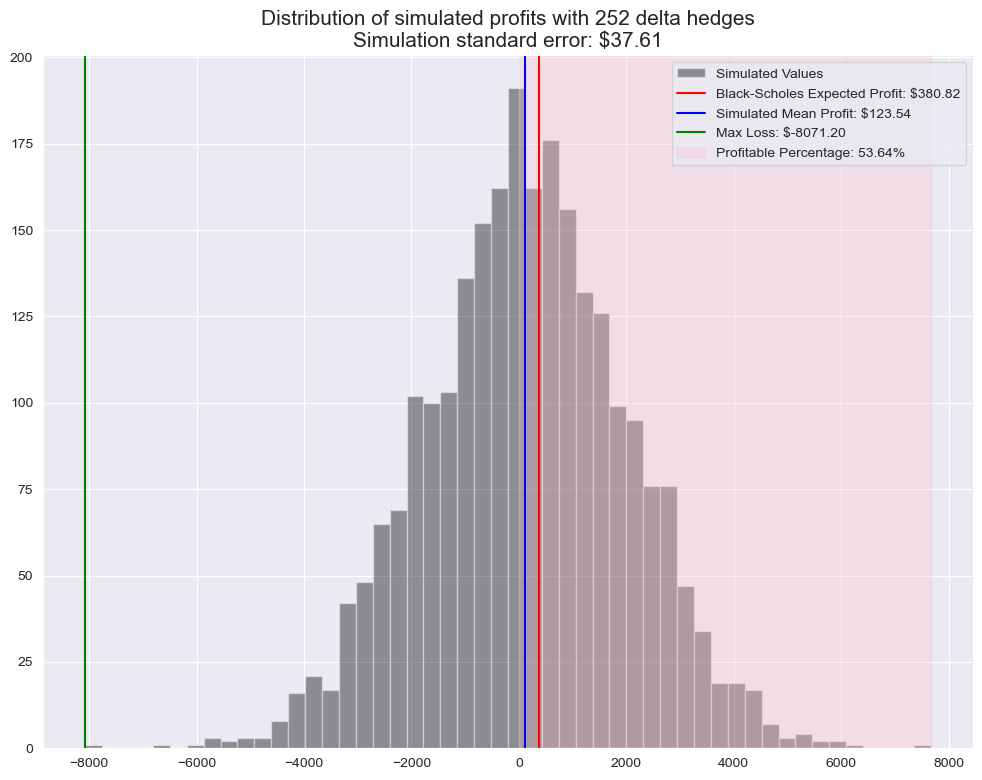

In [16]:
plt.figure(figsize=(12, 9))
plt.hist(profits_hedged, bins=50, alpha=0.4, color='black', label='Simulated Values')
plt.axvline(num_options * (premium - bs_price), color='red',
            label=f'Black-Scholes Expected Profit: ${num_options * (premium - bs_price):.2f}')
plt.axvline(np.mean(profits_hedged), color='blue',
            label=f'Simulated Mean Profit: ${np.mean(profits_hedged):.2f}')
plt.axvline(np.min(profits_hedged), color='green', label=f'Max Loss: ${np.min(profits_hedged):.2f}')
plt.axvspan(0, np.max(profits_hedged), color='pink', alpha=0.3,
            label=f'Profitable Percentage: {np.mean(profits_hedged >= 0) * 100:.2f}%')
plt.legend()
plt.title(f'Distribution of simulated profits with {n_steps} delta hedges\n'
          f'Simulation standard error: ${np.std(profits_hedged)/np.sqrt(n_paths):.2f}', fontsize=15)
plt.show()


Simulated Stock paths 

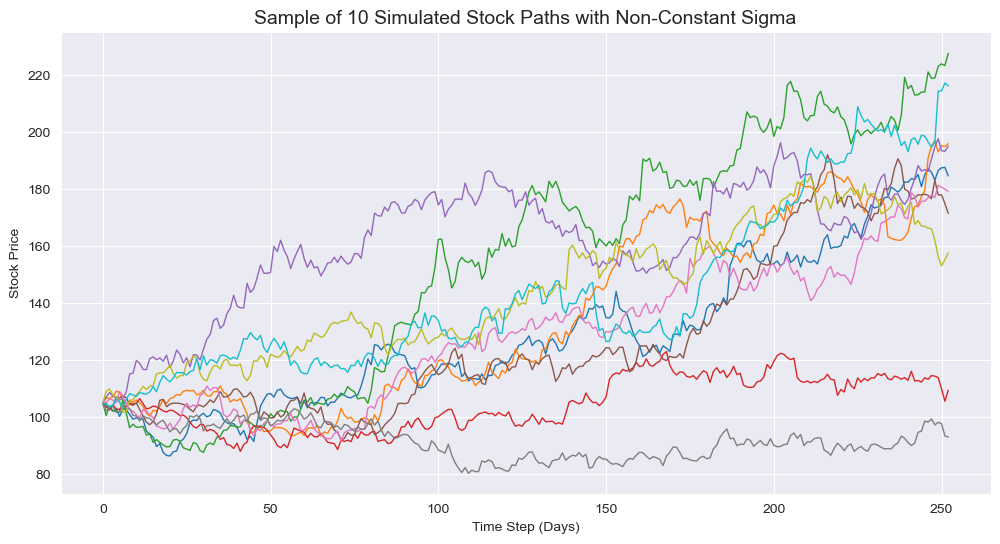

In [17]:
# Simulate a small number of stock paths using random sigma per step
S0 = 105
t = 1
r = 0.035
mu = 0.4
n_paths_sample = 10
n_steps = 252

# Reuse the same function from earlier
paths_sample, sigma_sample = simulate_path_with_custom_sigma(S0, t, r, mu, n_paths_sample, n_steps)

# Plot the sample paths
plt.figure(figsize=(12, 6))
for path in paths_sample:
    plt.plot(path, lw=1)

plt.title(f"Sample of {n_paths_sample} Simulated Stock Paths with Non-Constant Sigma", fontsize=14)
plt.xlabel("Time Step (Days)")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()


 Repeat simulation above but with different drift term in stock model

In [19]:
# Parameters
S0 = 105
K = 100
t = 1
r = 0.035
mu = -0.4
n_paths = 2500
n_steps = 252
num_options = 1000
# Use average sigma to compute the premium
avg_sigma = 0.5 * 0.2 + 0.3 * 0.3 + 0.2 * 0.45

# Simulate
bs_price = bs_call(S0, K, avg_sigma, t, r)
premium = bs_call(S0, K, avg_sigma + 0.01, t, r)
sold_calls_hedged = MC_call_custom_sigma(S0, K, t, r, mu, n_paths, n_steps)
profits_hedged = num_options * (premium - sold_calls_hedged)


Plot Profit Distribution

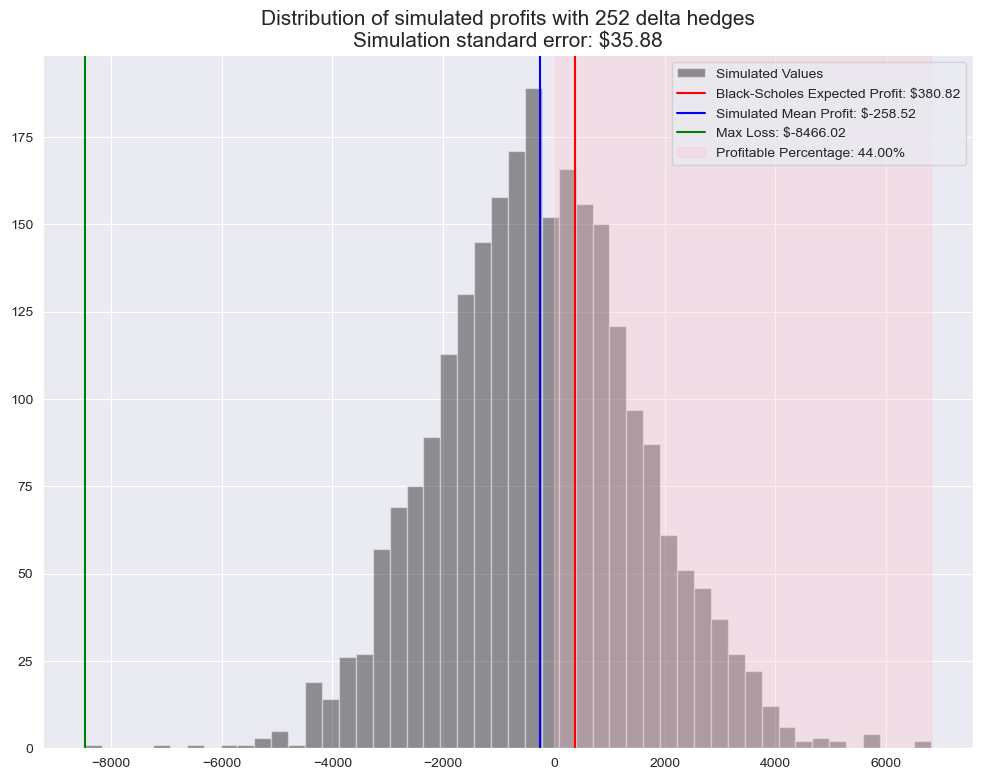

In [20]:
plt.figure(figsize=(12, 9))
plt.hist(profits_hedged, bins=50, alpha=0.4, color='black', label='Simulated Values')
plt.axvline(num_options * (premium - bs_price), color='red',
            label=f'Black-Scholes Expected Profit: ${num_options * (premium - bs_price):.2f}')
plt.axvline(np.mean(profits_hedged), color='blue',
            label=f'Simulated Mean Profit: ${np.mean(profits_hedged):.2f}')
plt.axvline(np.min(profits_hedged), color='green', label=f'Max Loss: ${np.min(profits_hedged):.2f}')
plt.axvspan(0, np.max(profits_hedged), color='pink', alpha=0.3,
            label=f'Profitable Percentage: {np.mean(profits_hedged >= 0) * 100:.2f}%')
plt.legend()
plt.title(f'Distribution of simulated profits with {n_steps} delta hedges\n'
          f'Simulation standard error: ${np.std(profits_hedged)/np.sqrt(n_paths):.2f}', fontsize=15)
plt.show()


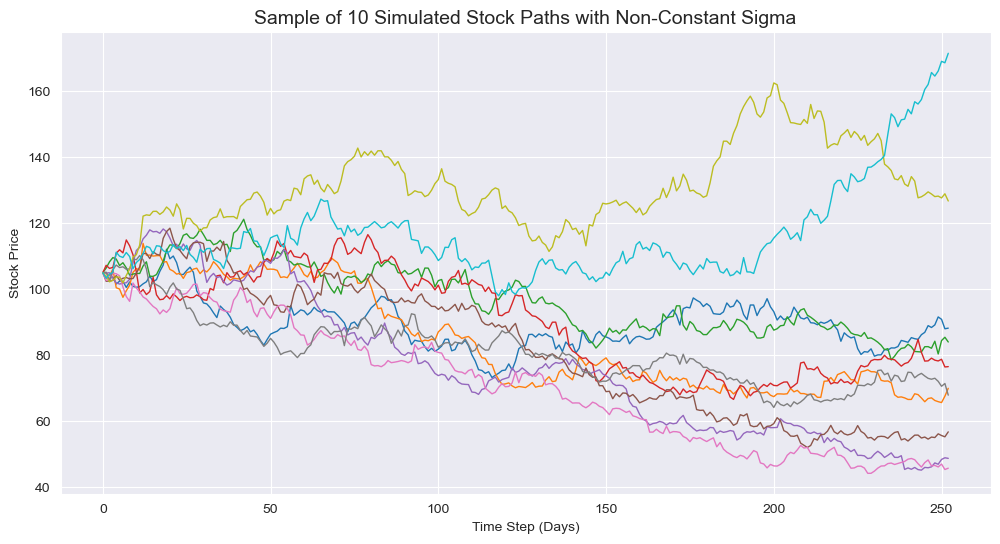

In [21]:
# Simulate a small number of stock paths using random sigma per step
S0 = 105
t = 1
r = 0.035
mu = -0.4
n_paths_sample = 10
n_steps = 252

# Reuse the same function from earlier
paths_sample, sigma_sample = simulate_path_with_custom_sigma(S0, t, r, mu, n_paths_sample, n_steps)

# Plot the sample paths
plt.figure(figsize=(12, 6))
for path in paths_sample:
    plt.plot(path, lw=1)

plt.title(f"Sample of {n_paths_sample} Simulated Stock Paths with Non-Constant Sigma", fontsize=14)
plt.xlabel("Time Step (Days)")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()


#### Observations:

Considering non-constant custom volatilities for the profit distributions, comparing with constant volatility profit distributions, we have the following observations: \
- Standard error increased a lot, that is because of the non-constant volatility
- Black-Scholes Expected profit similar, this should be the case because we use a constant volatility for B-S price which comes from the average of the non-constant volatilities, which is similar to the one we previously used.
- We have seen that the simulated mean profit value decreased a lot. Even goes negative for negative drift
- Maximum loss increased by a big margin, as we have non-constant volatilities
- Profitable percentage also dropped a lot
  
** However, when we change the drift term (mu) for the non-constant volatility case (mu changes from 0.4 to -0.4), we can see that profit distributions also changed. When drift is negative, the simulated mean is negative and profit percentage dropped. However, the maximum loss stays quite same. 
Thus, unlike the constant volatility model, for non-constant volatility, the distribution of profits is not neutral to upward and downward drift in a stock path movements.

Next, we want to explore more the distribution of profit varying drift term (mu).

Varying drift term (mu) and Plotting Profit Distributions

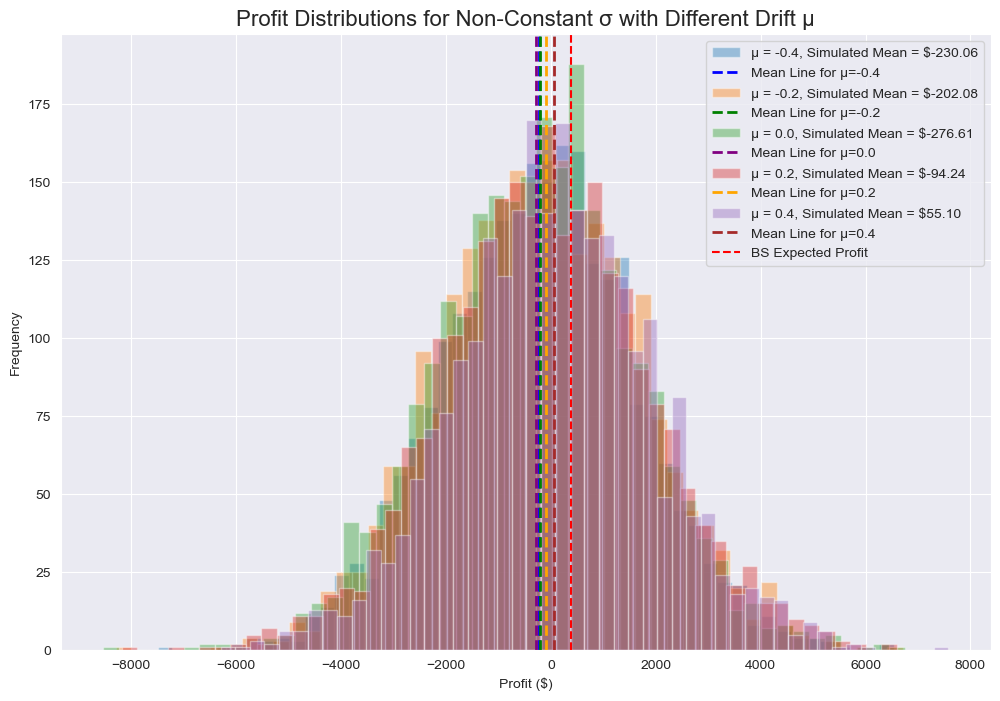

In [23]:
#Simulation for Multiple μ Values
mu_list = [-0.4, -0.2, 0.0, 0.2, 0.4]
mean_colors = ['blue', 'green', 'purple', 'orange', 'brown']
S0 = 105
K = 100
t = 1
r = 0.035
n_sims = 2500
n_steps = 252
delta_sims = 250
num_options = 1000

# Use average sigma to compute the premium
avg_sigma = 0.5 * 0.2 + 0.3 * 0.3 + 0.2 * 0.45
premium = bs_call(S0, K, avg_sigma + 0.01, t, r)
bs_price = bs_call(S0, K, avg_sigma, t, r)

plt.figure(figsize=(12, 8))
for i, mu in enumerate(mu_list):
    # Simulate profits
    sold_calls_hedged = MC_call_custom_sigma(S0, K, t, r, mu, n_paths, n_steps, delta_sims)
    profits_hedged = num_options * (premium - sold_calls_hedged)

    # Histogram
    plt.hist(profits_hedged, bins=50, alpha=0.4, label=f"μ = {mu}, Simulated Mean = ${np.mean(profits_hedged):.2f}")

    mean_profit = np.mean(profits_hedged)
    plt.axvline(mean_profit, color=mean_colors[i], linestyle="--", linewidth=2, label=f"Mean Line for μ={mu}")

plt.axvline(num_options*(premium-bs_price), color='red', linestyle='--', label=f"BS Expected Profit")

plt.title("Profit Distributions for Non-Constant σ with Different Drift μ", fontsize=16)
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

Drift affects the location (mean) of the profit distribution, but the impact is not that much. As drift goes negative, the mean profit goes negative too.  Profits are not neutral to upward and downward drift in a stock path movements, provided the non-constant volatility unlike we had for the constant volatility case.


#### Vary Non-Constant Sigma Regime
Now, we want to varu non-constant sigma's and update our function a little bit to see how different non-constant sigma affect the distribution 

In [24]:
def stock_path_custom_sigma(S0, t, r, mu, n_paths, n_steps, sigma_levels, sigma_probs):
    dt = t / n_steps
    noise = np.random.normal(0, 1, size=(n_paths, n_steps))
    sigma_path = np.random.choice(sigma_levels, p=sigma_probs, size=(n_paths, n_steps))
    increments = (mu + r - 0.5 * sigma_path**2) * dt + sigma_path * np.sqrt(dt) * noise
    log_returns = np.cumsum(increments, axis=1)
    paths = S0 * np.exp(log_returns)
    paths = np.insert(paths, 0, S0, axis=1)
    sigma_path = np.insert(sigma_path, 0, sigma_path[:, 0], axis=1)
    return paths, sigma_path


In [25]:
def MC_call_custom_sigma(S0, K, t, r, mu, n_paths, n_steps, delta_sims, sigma_levels, sigma_probs):
    paths, sigma_path = stock_path_custom_sigma(S0, t, r, mu, n_paths, n_steps, sigma_levels, sigma_probs)
    dt = t / n_steps
    call_payoffs = np.maximum(paths[:, -1] - K, 0) * np.exp(-r * t)

    delta_start = np.array([
        bs_MC_call_delta(S0, K, sigma_path[i, 0], t, r, delta_sims) for i in range(n_paths)
    ])
    first_profits = (paths[:, 1] - S0 * np.exp(dt * r)) * delta_start * np.exp(-dt * r)

    stock_profits = [first_profits]

    for i in range(1, n_steps):
        S_start = paths[:, i]
        S_end = paths[:, i + 1]
        tte = t - i * dt
        sigmas = sigma_path[:, i]
        deltas = bs_MC_call_delta_array(S_start, K, sigmas, tte, r, delta_sims)
        profit = (S_end - S_start * np.exp(r * dt)) * deltas * np.exp(-i * dt * r)
        stock_profits.append(profit)

    total_stock_profit = np.sum(stock_profits, axis=0)
    return call_payoffs - total_stock_profit

Loop over Different Non-Constant Volatility Regimes

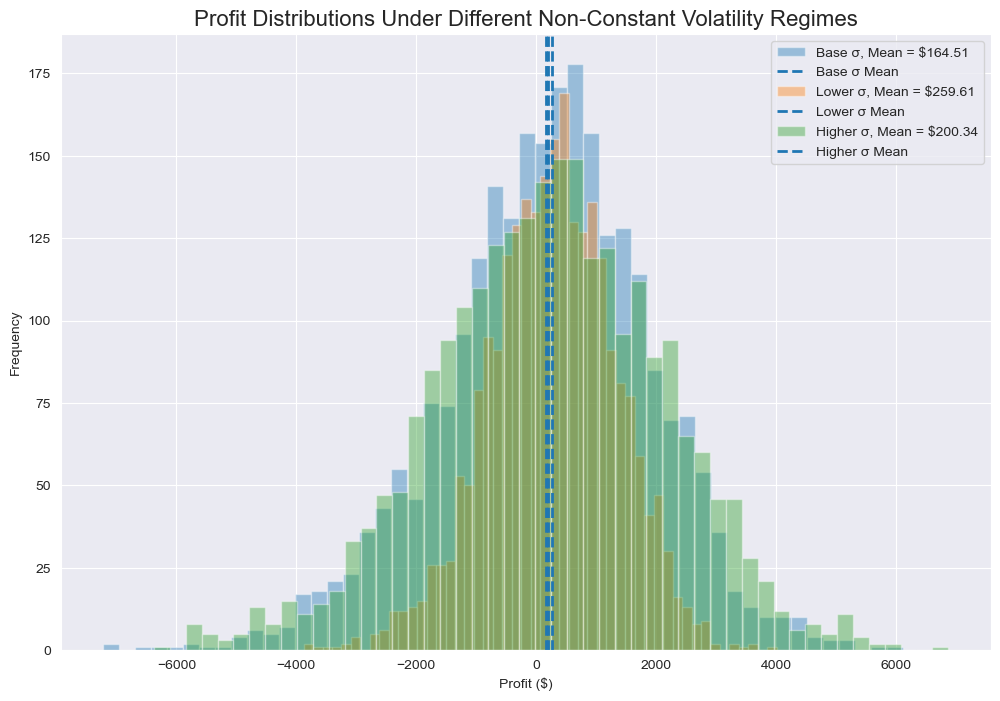

In [26]:
# Define volatility regimes
sigma_scenarios = [
    ([0.2, 0.3, 0.45], [0.5, 0.3, 0.2]),   # Original scenario
    ([0.15, 0.25, 0.35], [0.6, 0.3, 0.1]),  # Lower volatility
    ([0.3, 0.4, 0.5], [0.4, 0.4, 0.2]),     # Higher volatility
]

scenario_labels = ['Base σ', 'Lower σ', 'Higher σ']

# Parameters
mu = 0.4  # Fix drift to isolate sigma effect
S0 = 105
K = 100
t = 1
r = 0.035
n_paths = 2500
n_steps = 252
delta_sims = 250
num_options = 1000

plt.figure(figsize=(12, 8))

for (sigma_levels, sigma_probs), label in zip(sigma_scenarios, scenario_labels):
    avg_sigma = np.dot(sigma_levels, sigma_probs)
    premium = bs_call(S0, K, avg_sigma + 0.01, t, r)
    bs_price = bs_call(S0, K, avg_sigma, t, r)

    sold_calls_hedged = MC_call_custom_sigma(
        S0, K, t, r, mu, n_paths, n_steps, delta_sims, sigma_levels, sigma_probs
    )
    profits_hedged = num_options * (premium - sold_calls_hedged)
    plt.hist(profits_hedged, bins=50, alpha=0.4, label=f"{label}, Mean = ${np.mean(profits_hedged):.2f}")

    # Annotate mean
    mean_val = np.mean(profits_hedged)
    plt.axvline(mean_val, linestyle='--', label=f"{label} Mean", linewidth=2)

plt.title("Profit Distributions Under Different Non-Constant Volatility Regimes", fontsize=16)
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend()
plt.show()


##### observations: 
- Lower Volatility implies higher average profit and smaller losses. Hedging works better when the market is calmer
- Higher Volatility indicates profits are more spread out, with higher risk and more chance of big losses or gains
- Base Case sits in between the two

Delta hedging is more effective when volatility is lower and more stable. In volatile markets, even daily hedging can't fully control the risk — and profit outcomes vary a lot.

## 2. Profit and Loss (P&L) Distribution from Delta-Hedged Call Option Under Heston Model

In this part, we will use the stock paths simulated from the Heston stochastic volatility model and simulate the P&L distribution of a trader who sells European call options and hedges the exposure using delta hedging.



### Heston Path Simulation




In [31]:
def heston_path_sim(S0, v0, r, t, n_steps, kappa, theta, xi, rho, mu=0, n_sims=1, return_vol=False):
    """
    Simulation of stock path movements under the Heston stochastic volatility model.
    
    Parameters:
    - S0 (float): Initial stock price
    - v0 (float): Initial variance
    - r (float): Risk-free interest rate
    - t (float): Total time horizon (in years)
    - n_steps (int): Number of time steps
    - kappa (float): Rate of mean reversion of variance
    - theta (float): Long-run variance
    - xi (float): Volatility of volatility
    - rho (float): Correlation between Brownian motions
    - n_sims (int): Number of simulated paths
    - mu (float): Excess drift of log-returns
    - return_vol (bool): Whether to return the simulated variance paths

    Returns:
    - paths (ndarray): Simulated stock price paths of shape (n_sims, n_steps + 1)
    - vols (ndarray, optional): Simulated variance paths if return_vol is True
    """
    dt = t / n_steps
    N1 = np.random.normal(0, 1, size=(n_sims, n_steps))
    N2 = np.random.normal(0, 1, size=(n_sims, n_steps))
    Y = rho * N1 + np.sqrt(1 - rho**2) * N2

    paths = np.zeros((n_sims, n_steps + 1))
    vols = np.zeros((n_sims, n_steps + 1))
    paths[:, 0] = S0
    vols[:, 0] = v0

    for i in range(n_steps):
        vols[:, i + 1] = np.abs(vols[:, i] + kappa * (theta - vols[:, i]) * dt +
                                xi * np.sqrt(np.maximum(vols[:, i], 0) * dt) * N1[:, i])
        paths[:, i + 1] = paths[:, i] * np.exp((mu + r - 0.5 * vols[:, i]) * dt +
                                               np.sqrt(np.maximum(vols[:, i], 0) * dt) * Y[:, i])
    
    return (paths, vols) if return_vol else paths

Simulated stock paths under Heston model

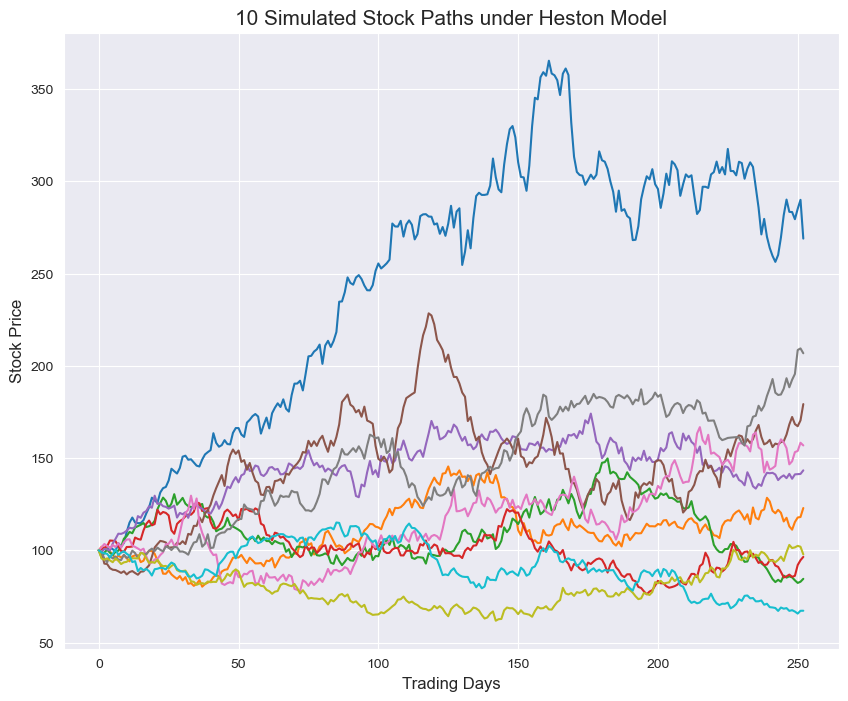

In [32]:
### Simulated stock paths under Heston model
kappa = 4
theta = .45**2
xi = .5
v0 = 0.4**2
rho = -0.05
S0 = 100
t = 1
n_steps = 252
r = 0.04
n_sims = 10
dt = t / n_steps
mu = .2


paths = heston_path_sim(S0, v0, r, t, n_steps, kappa, theta, xi, rho, mu, n_sims)


plt.figure(figsize = (10,8))

for path in paths:
    plt.plot(path)
    
plt.title(f'{n_sims} Simulated Stock Paths under Heston Model', size = 15)
plt.xlabel('Trading Days', size = 12)
plt.ylabel('Stock Price', size = 12)

plt.show()

In [34]:
def heston_call_MC(S0, K, v0, r, t, n_steps, kappa, theta, xi, rho, n_sims=2500, mu=0):
    """
    Monte-Carlo Simulation of Call Option under Heston model with Black-Scholes Delta control variates
    
    Parameters:
    - S0 (float): Initial stock price
    - K (float): Strike Price
    - v0 (float): Initial variance
    - r (float): Risk-free interest rate
    - t (float): Total time horizon (in years)
    - n_steps (int): Number of time steps
    - kappa (float): Rate of mean reversion of variance
    - theta (float): Long-run variance
    - xi (float): Volatility of volatility
    - rho (float): Correlation between Brownian motions
    - n_sims (int): Number of simulated paths
    - mu (float): Excess drift of log-returns
    - return_vol (bool): Whether to return the simulated variance paths

    Returns:
    - call_payouts (ndarray): Simulated payouts of a call-option
    """
    
    
    paths, vols = heston_path_sim(S0, v0, r, t, n_steps, kappa, theta, xi, rho,  mu, n_sims, return_vol=True)
    
    dt = t / n_steps

    # Compute BS deltas from previous steps volatility across all steps (n_steps, n_sims)
    # This is only an approximation of Delta of call option under Heston model.
    # The black-scholes deltas and Heston deltas are correlated enough so that black-scholes deltas
    # still work as a control variate in Monte-Carlo Simulation of Heston model option pricing
    
    deltas = np.array([bs_call_delta(paths[:, i], K, np.sqrt(vols[:,i]), t - i * dt, r) for i in range(n_steps)]).T  
    
    # Stock P&L from delta hedge
    stock_profits_steps = (paths[:, 1:] - np.exp(r*dt)*paths[:, :-1]) * deltas * np.exp(-r * np.arange(1, n_steps + 1) * dt)
    stock_profits = np.sum(stock_profits_steps, axis=1)

    # Call payouts
    call_payouts = np.maximum(paths[:, -1] - K, 0) * np.exp(-r * t)

    # Adjusted estimator
    call_payouts_hedged = call_payouts - stock_profits

    return call_payouts_hedged


Run Simulation

In [41]:
# Parameters
S0 = 105
K = 100
v0 = 0.09             # Initial variance (e.g., 0.3^2)
r = 0.035
t = 1
mu = 0.4              # Drift
n_steps = 252
n_sims = 2500
num_options = 1000

# Heston model parameters
kappa = 3.0           # Mean reversion speed
theta = 0.09          # Long-run variance
xi = 0.4              # Volatility of volatility
rho = -0.7            # Correlation between asset and volatility

# Compute Premium and BS Price
avg_sigma = np.sqrt(theta)  # Average implied volatility assumption
premium = bs_call(S0, K, avg_sigma + 0.01, t, r)  # Overpriced sale
bs_price = bs_call(S0, K, avg_sigma, t, r)

# Simulate Call Option Replication Costs under Heston
hedged_values = heston_call_MC(S0, K, v0, r, t, n_steps, kappa, theta, xi, rho, n_sims, mu)

# Compute Profit (premium - hedging cost)
profits_hedged = num_options * (premium - hedged_values)

# Compute metrics
sim_mean = np.mean(profits_hedged)
sim_se = np.std(profits_hedged) / np.sqrt(n_sims)
bs_expected = num_options * (premium - bs_price)
max_loss = np.min(profits_hedged)
profit_percent = np.mean(profits_hedged >= 0) * 100




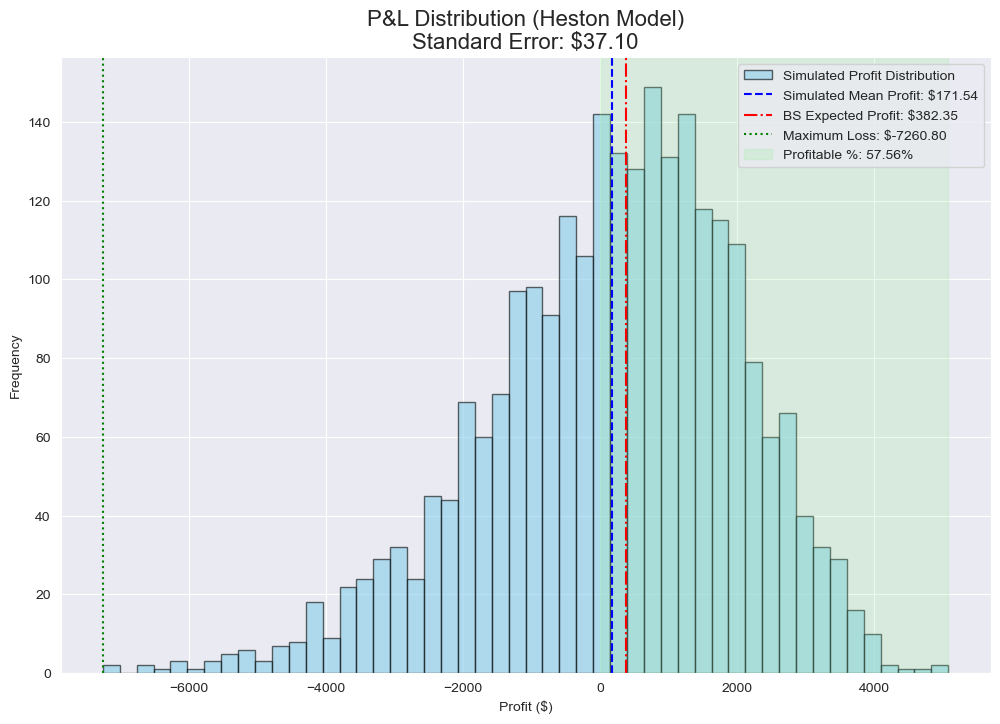

In [43]:
# Plot the Distribution 
plt.figure(figsize=(12, 8))
plt.hist(profits_hedged, bins=50, alpha=0.6, color='skyblue', edgecolor='black',label="Simulated Profit Distribution")
plt.axvline(sim_mean, color="blue", linestyle="--", label=f"Simulated Mean Profit: ${sim_mean:.2f}")

plt.axvline(bs_expected, color="red", linestyle="-.", label=f"BS Expected Profit: ${bs_expected:.2f}")

plt.axvline(max_loss, color="green", linestyle=":", label=f"Maximum Loss: ${max_loss:.2f}")
plt.axvspan(0, max(profits_hedged), color="lightgreen", alpha=0.2,
            label=f"Profitable %: {profit_percent:.2f}%")

plt.title(f"P&L Distribution (Heston Model)\nStandard Error: ${sim_se:.2f}", fontsize=16)
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

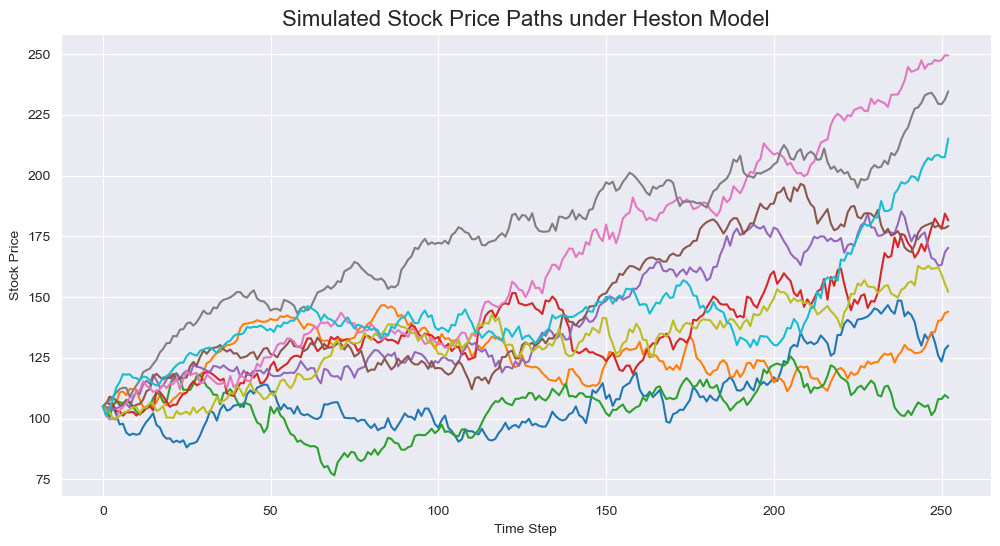

In [46]:
# Parameters
S0 = 105
v0 = 0.09
r = 0.035
t = 1
mu = 0.4
n_steps = 252
n_sims = 10  # Only a few paths for visualization

# Heston parameters
kappa = 3.0
theta = 0.09
xi = 0.4
rho = -0.7

# Simulate paths
paths, vols = heston_path_sim(S0, v0, r, t, n_steps, kappa, theta, xi, rho, mu, n_sims, return_vol=True)

# Plot the stock price paths
plt.figure(figsize=(12, 6))
for i in range(n_sims):
    plt.plot(paths[i], lw=1.5)
plt.title("Simulated Stock Price Paths under Heston Model", fontsize=16)
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()


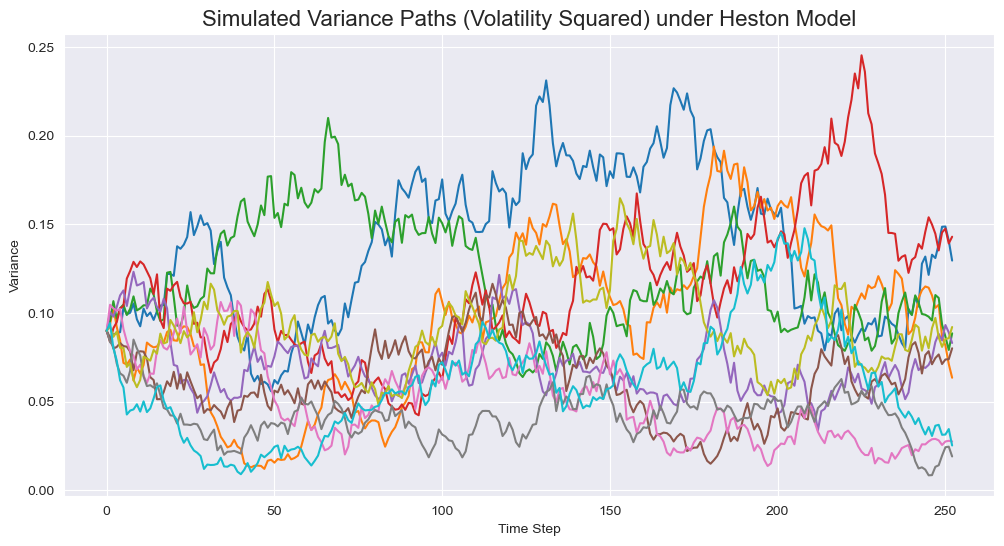

In [47]:
plt.figure(figsize=(12, 6))
for i in range(n_sims):
    plt.plot(vols[i], lw=1.5)
plt.title("Simulated Variance Paths (Volatility Squared) under Heston Model", fontsize=16)
plt.xlabel("Time Step")
plt.ylabel("Variance")
plt.grid(True)
plt.show()


Now we will change the drift term (mu) and see the profit and loss (P&L) distribution

In [48]:
# Parameters
S0 = 105
K = 100
v0 = 0.09             # Initial variance (e.g., 0.3^2)
r = 0.035
t = 1
mu = -0.4              # Drift
n_steps = 252
n_sims = 2500
num_options = 1000

# Heston model parameters
kappa = 3.0           # Mean reversion speed
theta = 0.09          # Long-run variance
xi = 0.4              # Volatility of volatility
rho = -0.7            # Correlation between asset and volatility

# Compute Premium and BS Price
avg_sigma = np.sqrt(theta)  # Average implied volatility assumption
premium = bs_call(S0, K, avg_sigma + 0.01, t, r)  # Overpriced sale
bs_price = bs_call(S0, K, avg_sigma, t, r)

# Simulate Call Option Replication Costs under Heston
hedged_values = heston_call_MC(S0, K, v0, r, t, n_steps, kappa, theta, xi, rho, n_sims, mu)

# Compute Profit (premium - hedging cost)
profits_hedged = num_options * (premium - hedged_values)

# Compute metrics
sim_mean = np.mean(profits_hedged)
sim_se = np.std(profits_hedged) / np.sqrt(n_sims)
bs_expected = num_options * (premium - bs_price)
max_loss = np.min(profits_hedged)
profit_percent = np.mean(profits_hedged >= 0) * 100




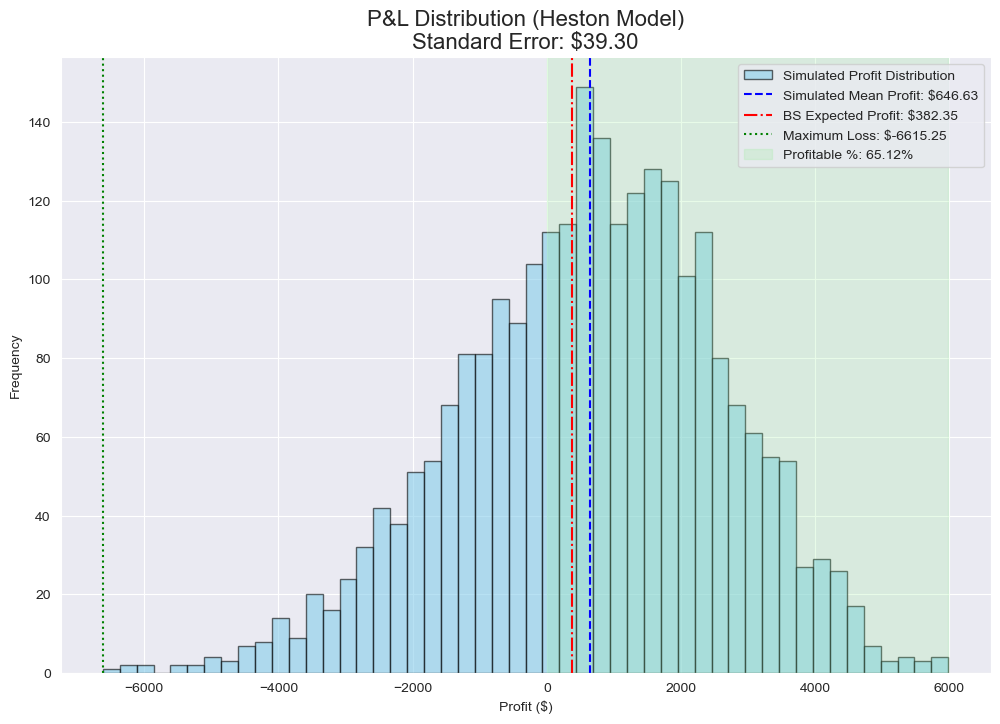

In [49]:
# Plot the Distribution 
plt.figure(figsize=(12, 8))
plt.hist(profits_hedged, bins=50, alpha=0.6, color='skyblue', edgecolor='black',label="Simulated Profit Distribution")
plt.axvline(sim_mean, color="blue", linestyle="--", label=f"Simulated Mean Profit: ${sim_mean:.2f}")

plt.axvline(bs_expected, color="red", linestyle="-.", label=f"BS Expected Profit: ${bs_expected:.2f}")

plt.axvline(max_loss, color="green", linestyle=":", label=f"Maximum Loss: ${max_loss:.2f}")
plt.axvspan(0, max(profits_hedged), color="lightgreen", alpha=0.2,
            label=f"Profitable %: {profit_percent:.2f}%")

plt.title(f"P&L Distribution (Heston Model)\nStandard Error: ${sim_se:.2f}", fontsize=16)
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

For multiple mu

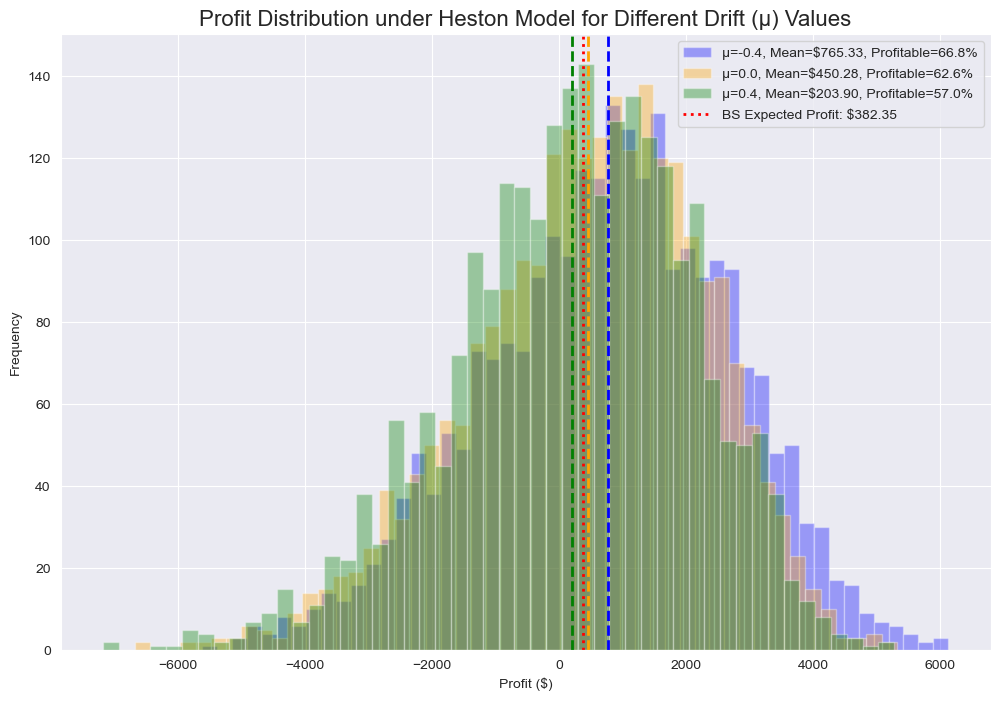

In [50]:
# List of drift values
mu_list = [-0.4, 0.0, 0.4]
colors = ['blue', 'orange', 'green']

# Heston model & option parameters
S0 = 105
K = 100
v0 = 0.09
r = 0.035
t = 1
n_steps = 252
n_sims = 2500
num_options = 1000

# Heston parameters
kappa = 3.0
theta = 0.09
xi = 0.4
rho = -0.7

# Black-Scholes prices for reference (using avg sigma)
avg_sigma = np.sqrt(theta)
bs_price = bs_call(S0, K, avg_sigma, t, r)
premium = bs_call(S0, K, avg_sigma + 0.01, t, r)

# Start plotting
plt.figure(figsize=(12, 8))

for i, mu in enumerate(mu_list):
    # Simulate hedged payouts using Heston MC
    hedged_payouts = heston_call_MC(S0, K, v0, r, t, n_steps,
                                     kappa, theta, xi, rho,
                                     n_sims=n_sims, mu=mu)
    
    # Compute profit
    profits = num_options * (premium - hedged_payouts)

    # Plot histogram
    plt.hist(profits, bins=50, alpha=0.35, color=colors[i],
             label=f"μ={mu}, Mean=${np.mean(profits):.2f}, Profitable={np.mean(profits>=0)*100:.1f}%")
    
    # Add vertical mean line
    plt.axvline(np.mean(profits), color=colors[i], linestyle='--', linewidth=2)

# Add BS expected profit line
bs_expected = num_options * (premium - bs_price)
plt.axvline(bs_expected, color="red", linestyle=":", linewidth=2,
            label=f"BS Expected Profit: ${bs_expected:.2f}")

# Final plot formatting
plt.title("Profit Distribution under Heston Model for Different Drift (μ) Values", fontsize=16)
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


#### Observations: Impact of Drift (μ) on Hedged Call Seller's Profit (Heston Model)

The results show that:

Higher drift (μ) leads to lower average profit and a smaller chance of profit, since the stock is more likely to end in-the-money, increasing the cost of hedging.

Negative drift (μ = -0.4) yields the highest average profit ($765) and the highest profit probability (66.8%).

The Black-Scholes expected profit is $382.35, which is close to the simulated mean when μ = 0 (risk-neutral case).

As μ increases, both mean profit and profitability percentage decline, reflecting the greater risk to the option seller in bullish markets.

This highlights how market drift affects hedging outcomes even under stochastic volatility.



#### Instead of using an inflated Black-Scholes price as the premium (what the seller receives),now using expected call value under the Heston model as the premium

In [86]:
from scipy.integrate import quad
def heston_call(S0, K, v0, r, t, kappa, theta, xi, rho):
    """
    Price of a call option under Heston model
    
    Parameters:
    - S0 (float): Initial stock price
    - K (float): Strike Price
    - v0 (float): Initial variance
    - r (float): Risk-free interest rate
    - t (float): Time-to-expiration (in years)
    - kappa (float): Rate of mean reversion of variance
    - theta (float): Long-run variance
    - xi (float): Volatility of volatility
    - rho (float): Correlation between Brownian motions

    Returns:
    - call_price (float): Call option price
    """


    def integrand(phi, Pnum):
        i = complex(0, 1)
        u = 0.5 if Pnum == 1 else -0.5
        b = kappa - rho * xi if Pnum == 1 else kappa
        a = kappa * theta
        d = np.sqrt((rho * xi * phi * i - b)**2 - xi**2 * (2 * u * phi * i - phi**2))
        g = (b - rho * xi * phi * i + d) / (b - rho * xi * phi * i - d)
        
        exp1 = np.exp(i * phi * np.log(S0 / K))
        C = r * phi * i * t + a / xi**2 * ((b - rho * xi * phi * i + d) * t - 2 * np.log((1 - g * np.exp(d * t)) / (1 - g)))
        D = (b - rho * xi * phi * i + d) / xi**2 * ((1 - np.exp(d * t)) / (1 - g * np.exp(d * t)))
        f = exp1 * np.exp(C + D * v0)
        return np.real(f / (phi * i))

    P1 = 0.5 + (1 / np.pi) * quad(lambda phi: integrand(phi, 1), 0, 100)[0]
    P2 = 0.5 + (1 / np.pi) * quad(lambda phi: integrand(phi, 2), 0, 100)[0]
    call_price = S0 * P1 - K * np.exp(-r * t) * P2
    return call_price

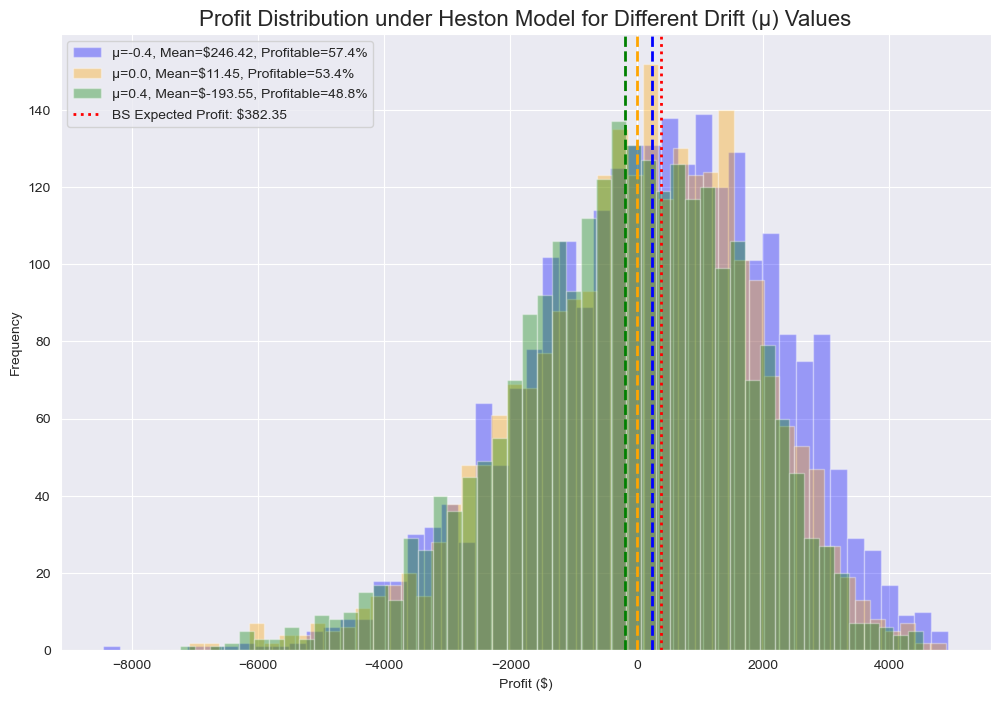

In [87]:
# List of drift values
mu_list = [-0.4, 0.0, 0.4]
colors = ['blue', 'orange', 'green']

# Heston model & option parameters
S0 = 105
K = 100
v0 = 0.09
r = 0.035
t = 1
n_steps = 252
n_sims = 2500
num_options = 1000

# Heston parameters
kappa = 3.0
theta = 0.09
xi = 0.4
rho = -0.7

premium= heston_call(S0, K, v0+0.001, r, t, kappa, theta, xi, rho)

# Black-Scholes prices for reference (using avg sigma)
avg_sigma = np.sqrt(theta)
bs_price = bs_call(S0, K, avg_sigma, t, r)
bs_premium = bs_call(S0, K, avg_sigma + 0.01, t, r)


# Start plotting
plt.figure(figsize=(12, 8))

for i, mu in enumerate(mu_list):
    # Simulate hedged payouts using Heston MC
    hedged_payouts = heston_call_MC(S0, K, v0, r, t, n_steps,
                                     kappa, theta, xi, rho,
                                     n_sims=n_sims, mu=mu)
    
    # Compute profit
    profits = num_options * (premium - hedged_payouts)

    # Plot histogram
    plt.hist(profits, bins=50, alpha=0.35, color=colors[i],
             label=f"μ={mu}, Mean=${np.mean(profits):.2f}, Profitable={np.mean(profits>=0)*100:.1f}%")
    
    # Add vertical mean line
    plt.axvline(np.mean(profits), color=colors[i], linestyle='--', linewidth=2)

# Add BS expected profit line
bs_expected = num_options * (bs_premium - bs_price)
plt.axvline(bs_expected, color="red", linestyle=":", linewidth=2,
            label=f"BS Expected Profit: ${bs_expected:.2f}")

# Final plot formatting
plt.title("Profit Distribution under Heston Model for Different Drift (μ) Values", fontsize=16)
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


#### When we used Heston model call price as the premium we got the same results as using Black-Scholes price as the premium

## 3. GARCH model

Simulate GARCH stock paths

In [61]:
###  GARCH(1,1) Volatility and Stock Path Simulation
def simulate_garch_path(S0, mu, r, t, n_steps, alpha0, alpha1, beta1, n_paths=2500):
    dt = t / n_steps
    eps = np.random.normal(0, 1, (n_paths, n_steps))
    
    sigma2 = np.zeros((n_paths, n_steps + 1))
    sigma2[:, 0] = alpha0 / (1 - alpha1 - beta1)
    
    paths = np.zeros((n_paths, n_steps + 1))
    paths[:, 0] = S0

    for i in range(n_steps):
        sigma2[:, i+1] = alpha0 + alpha1 * (eps[:, i]**2) + beta1 * sigma2[:, i]
        sigma = np.sqrt(sigma2[:, i+1])
        paths[:, i+1] = paths[:, i] * np.exp((mu + r - 0.5 * sigma2[:, i+1]) * dt + sigma * np.sqrt(dt) * eps[:, i])

    return paths, np.sqrt(sigma2[:, 1:])

Simulate Hedged Call Profits under GARCH Volatility

In [62]:
# GARCH-based Monte Carlo Call Options Profit simulation
def garch_call_MC_hedging(S0, K, r, t, mu, n_steps, alpha0, alpha1, beta1, n_paths=2500):
    paths, sigmas = simulate_garch_path(S0, mu, r, t, n_steps, alpha0, alpha1, beta1, n_paths)
    dt = t / n_steps

    # Compute BS deltas at each time step
    deltas = np.zeros((n_paths, n_steps))
    for i in range(n_steps):
        T_remaining = t - i*dt
        deltas[:, i] = bs_call_delta(paths[:, i], K, sigmas[:, i], T_remaining, r)

    # Compute stock P&L from delta hedging
    stock_pnl = (paths[:, 1:] - np.exp(r*dt)*paths[:, :-1]) * deltas * np.exp(-r * np.arange(1, n_steps+1) * dt)

    # Total hedging cost
    hedge_cost = np.sum(stock_pnl, axis=1)

    # Option payoff
    call_payoff = np.maximum(paths[:, -1] - K, 0) * np.exp(-r * t)

    # Final P&L
    return call_payoff - hedge_cost

Run Simulation

In [77]:
# Parameters
S0 = 105
K = 100
t = 1
r = 0.035
mu = 0.4
n_paths = 2500
n_steps = 252

# GARCH parameters
alpha0 = 0.00001
alpha1 = 0.05
beta1 = 0.9

# GARCH simulation and pricing
garch_price = np.mean(garch_call_MC_hedging(S0, K, r, t, mu, n_steps, alpha0, alpha1, beta1))
premium = garch_price + 0.01  # Sell above estimated fair value
bs_price = bs_call(S0, K, np.sqrt(alpha0 / (1 - alpha1 - beta1)), t, r)
bs_premium = bs_call(S0, K, np.sqrt(alpha0 / (1 - alpha1 - beta1)) + 0.01, t, r)
expected_profit_bs = (bs_premium - bs_price)

# Simulated profits
profits = premium - garch_call_MC_hedging(S0, K, r, t, mu, n_steps, alpha0, alpha1, beta1)
profits *= 1000  # Selling 1000 contracts


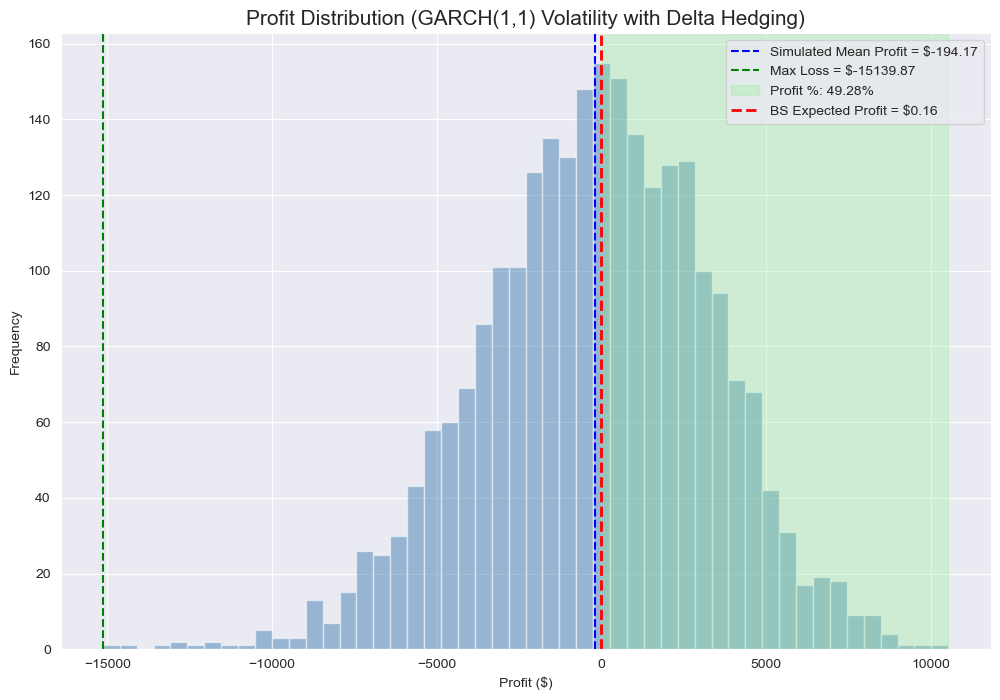

In [79]:
# Plot
plt.figure(figsize=(12, 8))
plt.hist(profits, bins=50, alpha=0.5, color='steelblue')
plt.axvline(np.mean(profits), color='blue', linestyle='--', label=f'Simulated Mean Profit = ${np.mean(profits):.2f}')

plt.axvline(np.min(profits), color='green', linestyle='--', label=f'Max Loss = ${np.min(profits):.2f}')
plt.axvspan(0, max(profits), color='lightgreen', alpha=0.3, label=f'Profit %: {np.mean(profits >= 0) * 100:.2f}%')

plt.axvline(1000*expected_profit_bs, color='red', linestyle='--', linewidth=2, label=f"BS Expected Profit = ${1000*expected_profit_bs:.2f}")

plt.title("Profit Distribution (GARCH(1,1) Volatility with Delta Hedging)", fontsize=15)
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

Run Simulation changing the drift term (mu)

In [80]:
# Parameters
S0 = 105
K = 100
t = 1
r = 0.035
mu = -0.4
n_paths = 2500
n_steps = 252

# GARCH parameters
alpha0 = 0.00001
alpha1 = 0.05
beta1 = 0.9

# GARCH simulation and pricing
garch_price = np.mean(garch_call_MC_hedging(S0, K, r, t, mu, n_steps, alpha0, alpha1, beta1))
premium = garch_price + 0.01  # Sell above estimated fair value
bs_price = bs_call(S0, K, np.sqrt(alpha0 / (1 - alpha1 - beta1)), t, r)
bs_premium = bs_call(S0, K, np.sqrt(alpha0 / (1 - alpha1 - beta1)) + 0.01, t, r)
expected_profit_bs = (bs_premium - bs_price)

# Simulated profits
profits = premium - garch_call_MC_hedging(S0, K, r, t, mu, n_steps, alpha0, alpha1, beta1)
profits *= 1000  # Selling 1000 contracts


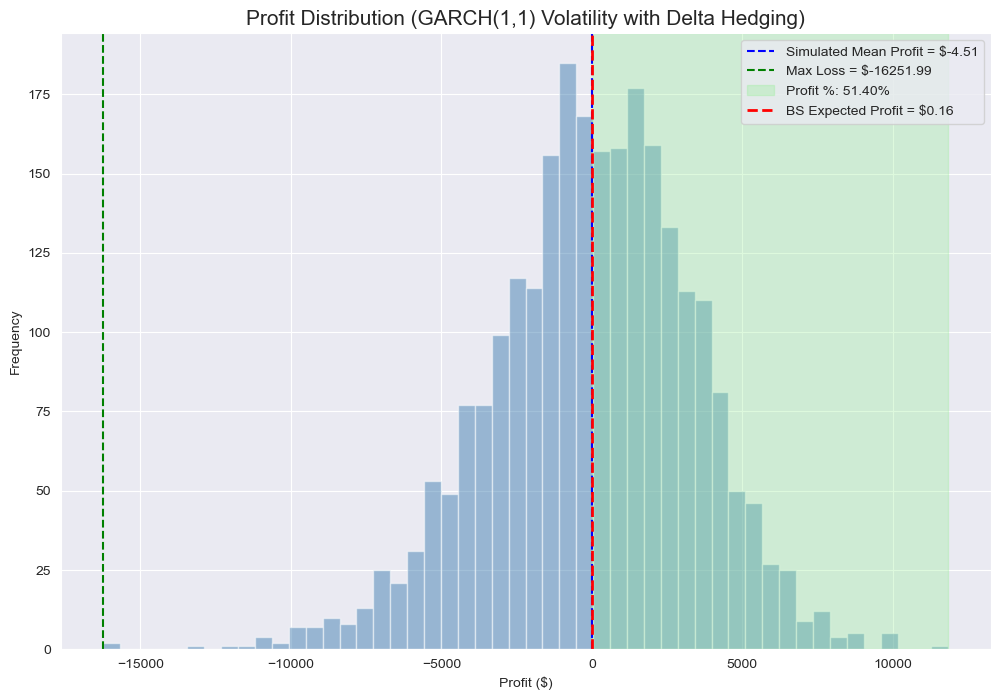

In [81]:
# Plot
plt.figure(figsize=(12, 8))
plt.hist(profits, bins=50, alpha=0.5, color='steelblue')
plt.axvline(np.mean(profits), color='blue', linestyle='--', label=f'Simulated Mean Profit = ${np.mean(profits):.2f}')

plt.axvline(np.min(profits), color='green', linestyle='--', label=f'Max Loss = ${np.min(profits):.2f}')
plt.axvspan(0, max(profits), color='lightgreen', alpha=0.3, label=f'Profit %: {np.mean(profits >= 0) * 100:.2f}%')

plt.axvline(1000*expected_profit_bs, color='red', linestyle='--', linewidth=2, label=f"BS Expected Profit = ${1000*expected_profit_bs:.2f}")


plt.title("Profit Distribution (GARCH(1,1) Volatility with Delta Hedging)", fontsize=15)
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

Simulation for Multiple μ Values (with GARCH Volatility & BS Delta Hedging)


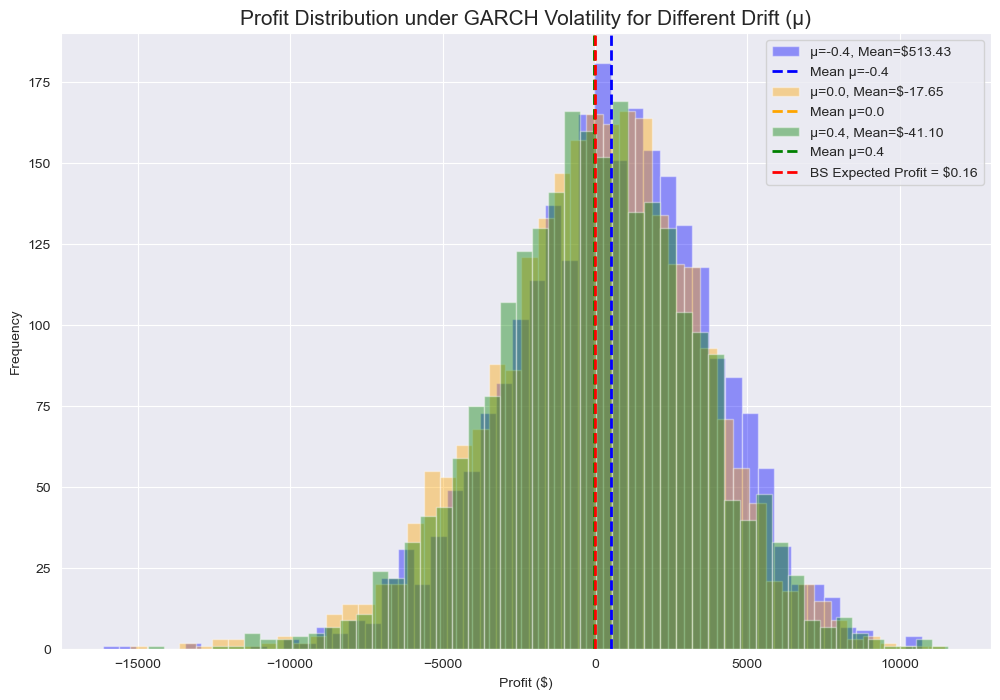

In [82]:
# Drift values to compare
mu_list = [-0.4, 0.0, 0.4]
colors = ['blue', 'orange', 'green']

# Parameters
S0 = 105
K = 100
t = 1
r = 0.035
n_paths = 2500
n_steps = 252
alpha0 = 0.00001
alpha1 = 0.05
beta1 = 0.9

# GARCH fair price and premium
garch_price = np.mean(garch_call_MC_hedging(S0, K, r, t, 0.2, n_steps, alpha0, alpha1, beta1))  # with baseline mu
premium = garch_price + 0.01
bs_price = bs_call(S0, K, np.sqrt(alpha0 / (1 - alpha1 - beta1)), t, r)
bs_premium = bs_call(S0, K, np.sqrt(alpha0 / (1 - alpha1 - beta1)) + 0.01, t, r)
expected_profit_bs = (bs_premium - bs_price)

# Plotting
plt.figure(figsize=(12, 8))

for i, mu in enumerate(mu_list):
    profits = premium - garch_call_MC_hedging(S0, K, r, t, mu, n_steps, alpha0, alpha1, beta1)
    profits *= 1000  # Sell 1000 contracts

    plt.hist(profits, bins=50, alpha=0.4, label=f"μ={mu}, Mean=${np.mean(profits):.2f}", color=colors[i])
    plt.axvline(np.mean(profits), color=colors[i], linestyle='--', linewidth=2, label=f"Mean μ={mu}")

plt.axvline(1000*expected_profit_bs, color='red', linestyle='--', linewidth=2, label=f"BS Expected Profit = ${1000*expected_profit_bs:.2f}")

plt.title("Profit Distribution under GARCH Volatility for Different Drift (μ)", fontsize=15)
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [83]:
print(f"Premium Used: {premium:.4f}")

for mu in mu_list:
    prof = premium - garch_call_MC_hedging(S0, K, r, t, mu, n_steps, alpha0, alpha1, beta1)
    prof *= 1000
    print(f"μ = {mu:4}: Mean Profit = ${np.mean(prof):.2f}, Profit % = {np.mean(prof >= 0)*100:.2f}%, Max Loss = ${np.min(prof):.2f}")


Premium Used: 34.2525
μ = -0.4: Mean Profit = $569.88, Profit % = 58.36%, Max Loss = $-12512.76
μ =  0.0: Mean Profit = $-37.66, Profit % = 50.92%, Max Loss = $-15654.23
μ =  0.4: Mean Profit = $37.47, Profit % = 52.20%, Max Loss = $-15961.51


When the drift is negative (μ = -0.4), the strategy is most profitable, with an average profit of $436.38 and a approximately 58% chance of being profitable. \
When the drift is zero or positive, the strategy loses on average, and profit likelihood is close to a coin toss (approx. 50%).\

Max loss increases with higher drift, possibly due to stronger upward movements in the stock price that make call options costlier to hedge after selling.

Selling calls and hedging using BS delta under GARCH volatility performs better when the underlying asset has downward or low drift. High drift increases the chance of the option ending deep in-the-money, making the hedge less effective